Dalam praktik penerapan teknik computer vision, Saya akan terapkan dengan menggunakan notebook dari google colab berikut.

Kasusnya, Saya ada gambar yang sepertinya layak untuk dijadikan sampel praktik ini hasil diagnosa gambar juga saya lampirkan dalam notebook ini.


In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


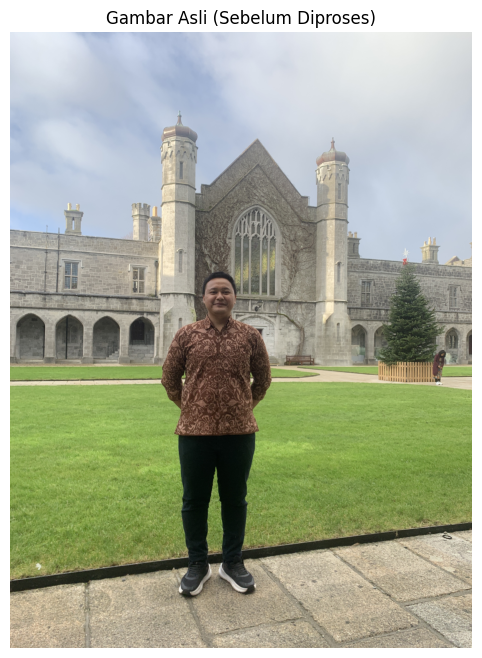

In [10]:
import cv2
import matplotlib.pyplot as plt

# Ganti dengan path file Anda yang benar
image_path = '/content/drive/MyDrive/Dataset/Tugas/CVImage.JPG'

# --- Langkah 1: Baca file gambar menggunakan OpenCV ---
gambar = cv2.imread(image_path)

# --- Langkah 2: Ubah format warna (OpenCV membaca BGR, Matplotlib menampilkan RGB) ---
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

# --- Langkah 3: Tampilkan data gambar yang sudah dibaca ---
plt.figure(figsize=(8, 8))
plt.imshow(gambar_rgb)
plt.title("Gambar Asli (Sebelum Diproses)")
plt.axis('off')
plt.show()

**CATATAN AWAL:**

Citra sampel merupakan sebuah foto yang diambil di luar ruangan dengan kondisi pencahayaan mendung. Analisis awal menunjukkan beberapa karakteristik yang menjadi target perbaikan citra sesuai dengan tujuan tugas:

1. **Gambar Gelap & Kontras** Rendah (Dark & Low-Contrast Image): Pencahayaan yang datar dan kurangnya sinar matahari langsung mengakibatkan citra yang terkesan pudar (keabu-abuan), sehingga citra secara keseluruhan dapat diklasifikasikan sebagai gambar dengan kontras rendah dan agak gelap pada beberapa titik.

2. **Potensi Detail Buram** (Blurred Image): Meskipun tidak buram secara signifikan, detail pada subjek (wajah dan motif batik) dan latar belakang (tekstur bangunan) dapat ditingkatkan. Dengan demikian, penerapan teknik penajaman citra relevan.



In [16]:
import cv2
import matplotlib.pyplot as plt

# 1. Tentukan path dan baca gambar
image_path = '/content/drive/MyDrive/Dataset/Tugas/CVImage.JPG'
original = cv2.imread(image_path)
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)


Menerapkan peningkatan kontras dengan metode CLAHE...
Menerapkan filter penajaman...


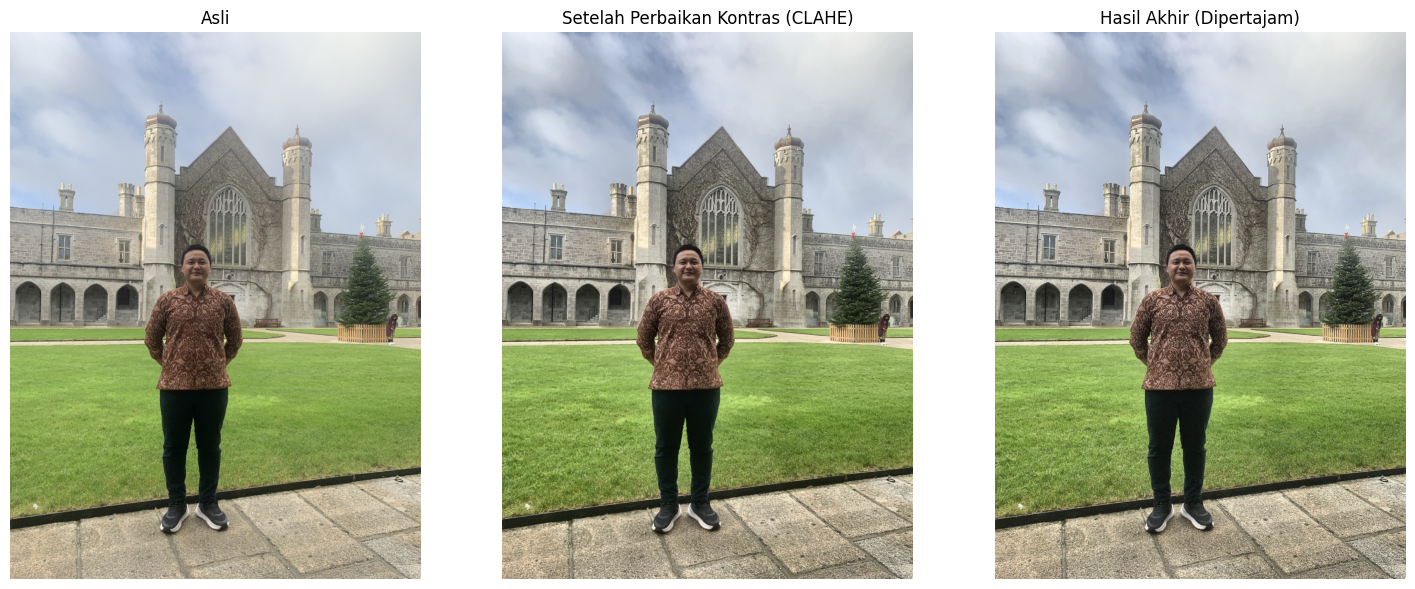

In [48]:
# Sharpening Filter
import numpy as np


#Metode CLAHE (Contrast Limited Adaptive Histogram Equalization)
#adalah teknik yang meningkatkan kontras dan kecerahan gambar secara lokal,bukan global.
#Referensi: Enhancing Medical Image Classification through Transfer Learning and CLAHE Optimization
#https://doi.org/10.2174/0115734056342623241119061744

print("Menerapkan peningkatan kontras dengan metode CLAHE...")

# Ubah ke format LAB dan terapkan CLAHE pada channel Lightness (L)
lab_image = cv2.cvtColor(gambar_rgb, cv2.COLOR_RGB2LAB)
l_channel, a_channel, b_channel = cv2.split(lab_image)

    #CLAHE ada 2 parameter Cliping Limit (CL) dan Block Size/TilenGride
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))

l_channel_clahe = clahe.apply(l_channel)
lab_image_clahe = cv2.merge([l_channel_clahe, a_channel, b_channel])
hasil_kontras_clahe = cv2.cvtColor(lab_image_clahe, cv2.COLOR_LAB2RGB)


# --- 2. Terapkan Filter Penajaman (Sharpening) ---
print("Menerapkan filter penajaman...")

#Penajaman Gambar High
# def pertajam_gambar(image):
#     kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
#     return cv2.filter2D(image, -1, kernel)

#Penajaman Gambar Mid
def pertajam_gambar(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)


# Terapkan penajaman pada gambar yang kontrasnya sudah diperbaiki
hasil_akhir_dipertajam = pertajam_gambar(hasil_kontras_clahe)


# --- 3. Tampilkan Perbandingan Hasil Akhir ---


plt.figure(figsize=(18, 10))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(gambar_rgb)
plt.title("Asli")
plt.axis('off')

# Hasil Kontras (dengan CLAHE)
plt.subplot(1, 3, 2)
plt.imshow(hasil_kontras_clahe)
plt.title("Setelah Perbaikan Kontras (CLAHE)")
plt.axis('off')

# Hasil Akhir (setelah dipertajam)
plt.subplot(1, 3, 3)
plt.imshow(hasil_akhir_dipertajam)
plt.title("Hasil Akhir (Dipertajam)")
plt.axis('off')

plt.show()

**Catatan Tahap 1 (Proses Diatas)**
1. Sebelum diterapkah metode CLAHE, awalnya diterapkan pencerahan dengan mengatur alfa dan beta, hasilnya karena bersifat global, gambar terlalu terang dan langit tidak terlihat.
2. Pada penerapan metode CLAHE 2 parameter utama sempat dilakukan *tuning*, dengan nilai paling cocok adalah (CL = 1 dan BS = 8x8).

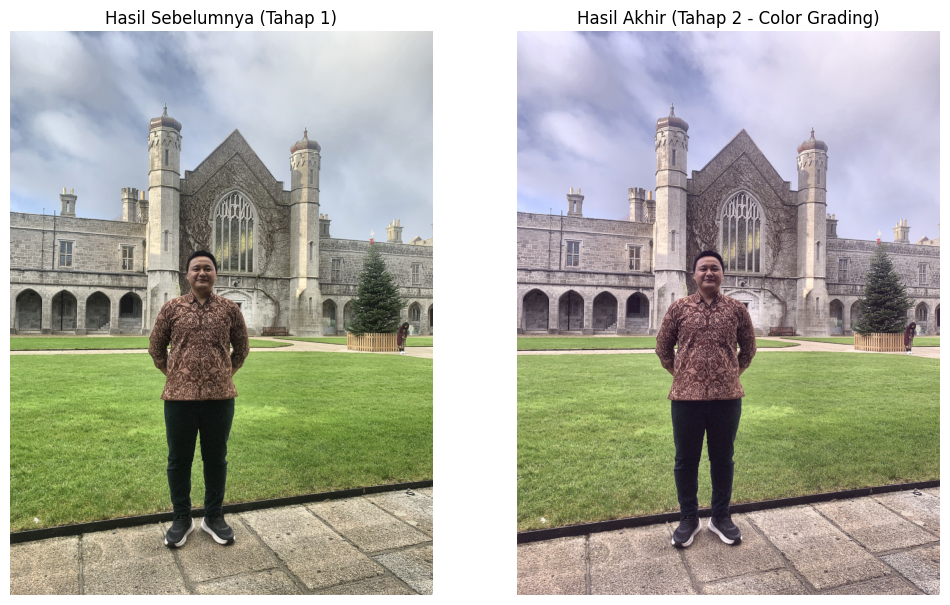

In [49]:
# Color Grading

if 'hasil_akhir_dipertajam' in locals():
    # Gambar yang akan diproses dicopy dahulu
    gambar_color_graded = hasil_akhir_dipertajam.copy()

    #Split Toning (Mencoba memberikan efek untuk tone gambar)
    # Menambahkan sedikit warna kuning/oranye ke channel Merah & Hijau (Highlights memberikan kesan warm)
    # dan sedikit warna biru ke channel Biru (Shadows)

    # Pisahkan channel warna
    r, g, b = cv2.split(gambar_color_graded)

    # Tambahkan rona oranye pada area terang dengan meningkatkan channel Merah sedikit
    r = cv2.add(r, 10)

    # Tambahkan rona teal/biru pada area gelap dengan meningkatkan channel Biru sedikit
    b = cv2.add(b, 15)

    # Gabungkan kembali channel warna
    hasil_color_graded = cv2.merge([r, g, b])

    # Perbandingan hasil tahap 1 dan tahap 2
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(hasil_akhir_dipertajam)
    plt.title("Hasil Sebelumnya (Tahap 1)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(hasil_color_graded)
    plt.title("Hasil Akhir (Tahap 2 - Color Grading)")
    plt.axis('off')

    plt.show()

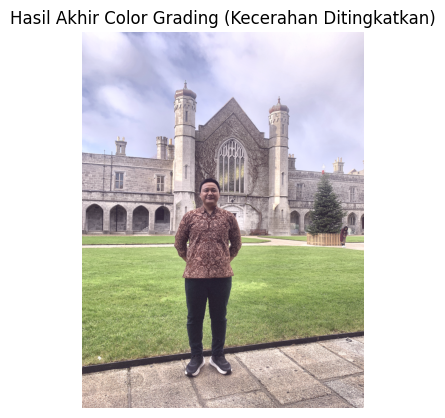

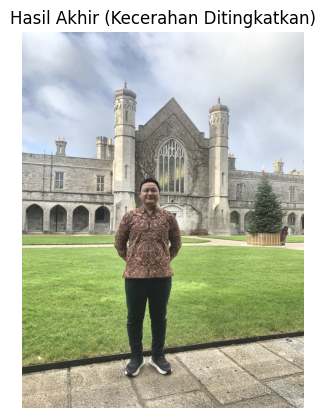

In [50]:
# Menaikkan kecerahan gambar secara global
gambar_lebih_cerah = cv2.convertScaleAbs(hasil_color_graded, alpha=1.0, beta=15)
gambar_lebih_cerah2 = cv2.convertScaleAbs(hasil_akhir_dipertajam, alpha=1.0, beta=15)

# Menampilkan gambar yang sudah lebih cerah
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(gambar_lebih_cerah)
plt.title("Hasil Akhir Color Grading (Kecerahan Ditingkatkan)")
plt.axis('off')
plt.show()

# Menampilkan gambar yang sudah lebih cerah
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.imshow(gambar_lebih_cerah2)
plt.title("Hasil Akhir (Kecerahan Ditingkatkan)")
plt.axis('off')
plt.show()